# Data Quality

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names
%config IPCompleter.greedy=True
pd.options.display.float_format = '{:,.2f}'.format

## Import data

In [2]:
df = pd.read_csv('../../02_Data/03_Work/work.csv',
                 index_col='client_id')
df

,employment,employment_duration,income,verified_income,rating,dti,housing,num_mortgages,num_credit_lines,pct_cards_75p,...,loan_id,description,purpose,principal,interest_rate,num_installments,installment_amount,amount_amortized,status,amount_recovered
client_id,,,,,,,,,,,,,,,,,,,,,
59561505,NaN,NaN,"36,000.00",Verified,E,29.93,MORTGAGE,2.00,12.00,60.00,...,NaN,NaN,debt_consolidation,"15,100.00",18.25,36 months,547.80,"15,100.00",Fully Paid,0.00
443000,Clark County Nevada,2 years,"59,363.00",Source Verified,C,14.47,RENT,NaN,5.00,NaN,...,NaN,In the last couple of months the interest rate...,credit_card,"6,000.00",13.22,36 months,202.81,"6,000.00",Fully Paid,0.00
27640646,AVP Finance,7 years,"240,000.00",Source Verified,B,7.74,MORTGAGE,5.00,16.00,20.00,...,NaN,NaN,debt_consolidation,"24,000.00",12.49,60 months,539.83,"24,000.00",Fully Paid,0.00
31327120,RN,2 years,"61,000.00",Not Verified,C,35.27,RENT,3.00,16.00,60.00,...,NaN,NaN,debt_consolidation,"5,600.00",14.65,36 months,193.17,"5,600.00",Fully Paid,0.00
94241181,Hotel Leader,10+ years,"77,000.00",Verified,C,16.95,RENT,2.00,14.00,60.00,...,NaN,NaN,debt_consolidation,"9,000.00",14.99,36 months,311.95,"2,563.02",Charged Off,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51876926,Office Manager,10+ years,"42,000.00",Not Verified,C,20.85,MORTGAGE,6.00,9.00,100.00,...,NaN,NaN,debt_consolidation,"8,000.00",12.29,36 months,266.83,"8,000.00",Fully Paid,0.00
121031962,Owner & President,6 years,"111,697.00",Verified,B,16.63,MORTGAGE,2.00,10.00,50.00,...,NaN,NaN,other,"10,000.00",9.44,36 months,320.05,"4,388.51",Current,0.00
135641397,Sr. Field Engineer,10+ years,"285,000.00",Source Verified,D,6.02,MORTGAGE,3.00,9.00,25.00,...,NaN,NaN,small_business,"30,000.00",17.47,36 months,"1,076.62","5,387.53",Current,0.00


### General vision

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 59561505 to 94394801
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   employment                     129740 non-null  object 
 1   employment_duration            131000 non-null  object 
 2   income                         140000 non-null  float64
 3   verified_income                140000 non-null  object 
 4   rating                         140000 non-null  object 
 5   dti                            139900 non-null  float64
 6   housing                        140000 non-null  object 
 7   num_mortgages                  136859 non-null  float64
 8   num_credit_lines               139999 non-null  float64
 9   pct_cards_75p                  135323 non-null  float64
 10  pct_revolving_utilization      139892 non-null  float64
 11  num_cancellations_12months     139994 non-null  float64
 12  num_derogatories          

### Data Types

In [4]:
df.dtypes

employment                        object
employment_duration               object
income                           float64
verified_income                   object
rating                            object
dti                              float64
housing                           object
num_mortgages                    float64
num_credit_lines                 float64
pct_cards_75p                    float64
pct_revolving_utilization        float64
num_cancellations_12months       float64
num_derogatories                 float64
months_since_last_delinquency    float64
loan_id                          float64
description                       object
purpose                           object
principal                        float64
interest_rate                    float64
num_installments                  object
installment_amount               float64
amount_amortized                 float64
status                            object
amount_recovered                 float64
dtype: object

### Unique values

In [5]:
df.nunique().sort_values()

loan_id                              0
num_installments                     2
verified_income                      3
housing                              6
num_cancellations_12months           7
rating                               7
status                               9
employment_duration                 11
purpose                             14
num_derogatories                    18
num_mortgages                       25
num_credit_lines                    62
months_since_last_delinquency      133
pct_cards_75p                      172
interest_rate                      580
pct_revolving_utilization         1099
principal                         1475
dti                               5247
description                       7839
amount_recovered                 10562
income                           11647
installment_amount               33688
employment                       54380
amount_amortized                 57814
dtype: int64

In [6]:
df.drop(columns='loan_id', inplace=True)

### Duplicated

In [7]:
df.duplicated().sum()

0

## Separate Num and Cat

In [8]:
cat = df.select_dtypes(exclude='number').copy()
num = df.select_dtypes(include = 'number').copy()

## Categorics

In [9]:
cat.shape

(140000, 9)

In [10]:
# nulls percentage

(cat.isna().sum()/140000*100).sort_values(ascending = False)


description           94.38
employment             7.33
employment_duration    6.43
rating                 0.00
verified_income        0.00
housing                0.00
purpose                0.00
num_installments       0.00
status                 0.00
dtype: float64

In [11]:
# description has mostly nulls
cat.description.dropna().head()

client_id
443000     In the last couple of months the interest rate...
550145       Borrower added on 07/25/10 > Using this loan...
9068034      Borrower added on 11/25/13 > My loan will be...
1334806      Borrower added on 06/04/12 > to pay my credi...
5760323      Borrower added on 06/12/13 > I have been try...
Name: description, dtype: object

In [12]:
# this is an open description
# there's only a 5% of them, so probably won't be very useful.

In [13]:
cat.description.value_counts(dropna=False)

description
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                  132138
                                                                                                                                                                                                                                                                                                                                                                                                                                                                         17
  Borrower added on 02/12/14 > debt consolidation<br>               

In [14]:
# let's see the employment case
cat.employment.value_counts(dropna=False)

employment
NaN                                 10260
Teacher                              2457
Manager                              2186
Owner                                1380
Registered Nurse                     1006
                                    ...  
Director Product Development            1
Audit Clerk                             1
Facilities Support Coordinator          1
California Department of Justice        1
lead Machine builder                    1
Name: count, Length: 54381, dtype: int64

In [15]:
# this is a relevant information
# null likely represents an Unknown job

In [16]:
cat.employment_duration.value_counts(dropna=False)

employment_duration
10+ years    46181
2 years      12492
< 1 year     11902
3 years      11280
1 year        9140
NaN           9000
5 years       8750
4 years       8539
6 years       6326
7 years       5789
8 years       5686
9 years       4915
Name: count, dtype: int64

In [17]:
# NaN here probably means is Unknown

### Correcting

In [18]:
var_impute_by_Unknown = [
    'description',
    'employment',
    'employment_duration'
]

In [19]:
cat[var_impute_by_Unknown] = cat[var_impute_by_Unknown].fillna('unknown')

## Numerics

### Nulls

In [20]:
#nulls

num.isna().sum().sort_values(ascending = False)

months_since_last_delinquency    71812
pct_cards_75p                     4677
num_mortgages                     3141
pct_revolving_utilization          108
dti                                100
num_cancellations_12months           6
num_derogatories                     1
num_credit_lines                     1
income                               0
principal                            0
interest_rate                        0
installment_amount                   0
amount_amortized                     0
amount_recovered                     0
dtype: int64

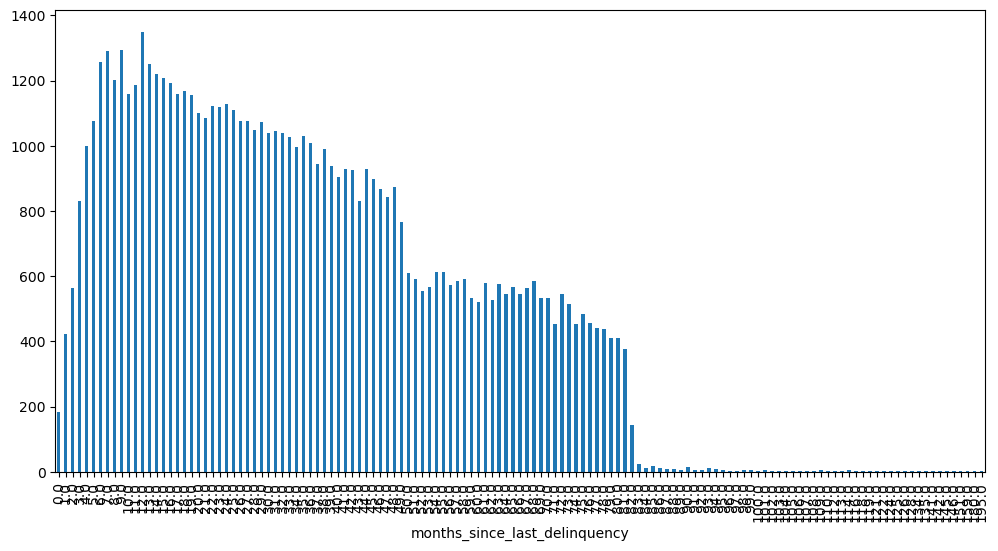

In [21]:
num.months_since_last_delinquency.value_counts().sort_index().plot.bar(figsize = (12,6));

In [22]:
# probably the nulls are users without any delinquencies

# we could impute by a high number like 999
# or just by 0, because the 0s are probably just an operative mistake


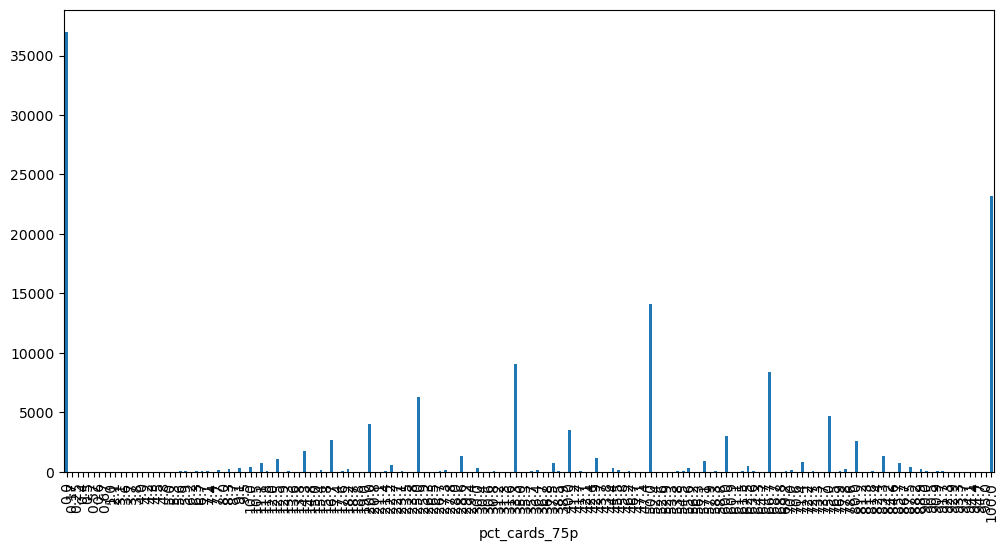

In [23]:
num.pct_cards_75p.value_counts().sort_index().plot.bar(figsize = (12,6));

In [24]:
# clearly impute by 0

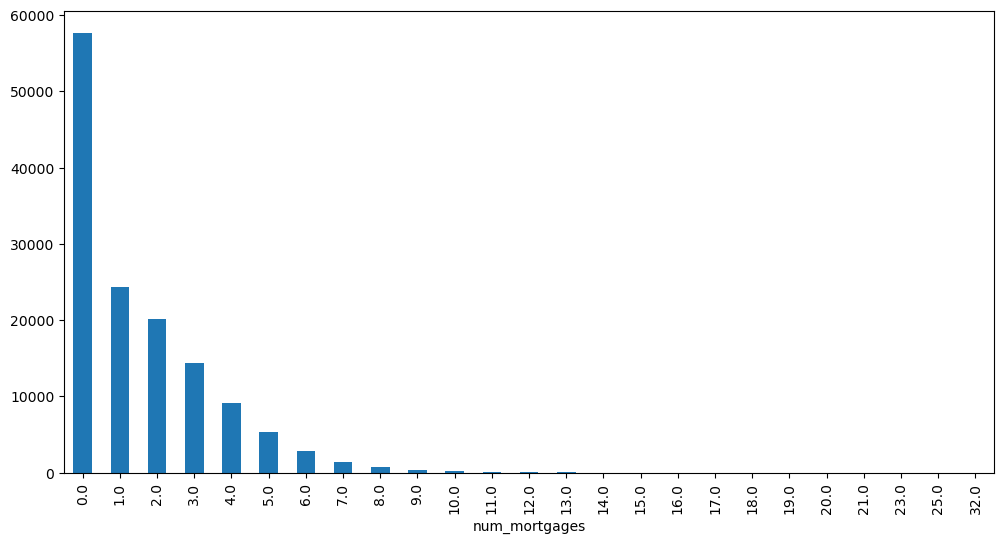

In [25]:
num.num_mortgages.value_counts().sort_index().plot.bar(figsize = (12,6));

In [26]:
# another impute by 0

In [27]:
num.fillna(0,inplace=True)

### Atypicals

In [28]:
num_std = 4

In [29]:
def indexes_of_atypicals_by_std(variable, num_std = 4):
    
    variable = variable.dropna()
    mean = np.mean(variable)
    sd = np.std(variable)
    threshold = sd * num_std
    lim_inf = mean - threshold
    lim_sup = mean + threshold
    # find indexes out of limits
    indexes = [index for index,value in variable.items() if value < lim_inf or value > lim_sup]
    return(indexes)

In [30]:
def atypical_count(df,variable, num_std = 4):
    atypicals = indexes_of_atypicals_by_std(df[variable], num_std)
    return(df.loc[atypicals,variable].value_counts())

In [31]:
var_atypicals_dt = ['income',
                   'principal',
                   'installment_amount',
                   'amount_recovered']

In [32]:
for variable in var_atypicals_dt:
    print('\n' + variable + ':\n')
    print(atypical_count(num,variable,num_std))


income:

income
450,000.00      41
500,000.00      36
600,000.00      18
650,000.00      15
550,000.00      14
                ..
4,680,804.00     1
563,000.00       1
950,000.00       1
941,000.00       1
8,500,021.00     1
Name: count, Length: 151, dtype: int64

principal:

Series([], Name: count, dtype: int64)

installment_amount:

installment_amount
1,566.80    2
1,714.54    1
1,587.02    1
Name: count, dtype: int64

amount_recovered:

amount_recovered
4,000.00     5
10,000.00    4
3,500.00     4
6,000.00     4
3,600.00     3
            ..
4,887.05     1
5,468.51     1
8,873.00     1
5,459.01     1
10,867.50    1
Name: count, Length: 1581, dtype: int64


In [33]:
num.income.describe()

count      140,000.00
mean        78,214.68
std         85,517.33
min              0.00
25%         46,000.00
50%         65,000.00
75%         93,000.00
max     10,999,200.00
Name: income, dtype: float64

In [34]:
# correct: we're going to eliminate income > 300k
# we need also to delete them from cat

In [35]:
to_eliminate = num.loc[num.income > 300000].index.values

In [36]:
cat = cat[~cat.index.isin(to_eliminate)]
num = num[~num.index.isin(to_eliminate)]

### Save Datasets

In [37]:

df.to_pickle('../../02_Data/03_Work/work_result_quality.pickle')
cat.to_pickle('../../02_Data/03_Work/cat_result_quality.pickle')
num.to_pickle('../../02_Data/03_Work/num_result_quality.pickle')

